In [ ]:
import pandas as pd
import numpy as np
# Feature Processing (Scikit-learn processing, etc. )
import sklearn
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import os, pickle
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
churn = pd.read_csv("/Users/darren/Downloads/Churn_Modelling.csv")
telco = pd.read_csv("/Users/darren/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
#telco.head()

In [ ]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#telco.loc[telco.Churn == 'Yes', 'Churn'] = 1
#telco.loc[telco.Churn == 'No', 'Churn'] = 0

In [ ]:
#telco.head()

In [ ]:
# turn gender,  into binary
churn.loc[churn.Gender == 'Female', 'Gender'] = 1
churn.loc[churn.Gender == 'Male', 'Gender'] = 0

In [ ]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# replace any white space or any string in any column with null
churn.replace(r'^\s*s', np.nan)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# apply one-hot encoding on categorical columns we need which here is just Geography
onehot_encoder = OneHotEncoder(sparse_output = False, drop = 'first')
onehot_encoded = onehot_encoder.fit_transform(churn[['Geography']])

churn_onehot_columns = onehot_encoder.get_feature_names_out(['Geography'])
churn[churn_onehot_columns] = onehot_encoded

# feature scaling on numeric columns
feature_scaling = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# fill missing values in the numeric columns with null
for feature in feature_scaling:
    churn[feature].fillna(churn[feature].median(), inplace = True)

churn.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1,0.0,0.0
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0,0.0,0.0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0


In [ ]:
# dependent variable is the exited column
y = churn['Exited']
# independents variable are the one-hot encoded, binary and numeric columns
x = churn.drop(columns = ['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis = 1)

In [ ]:
x.shape
y.shape
# divide data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

[[1488   97]
 [ 375   40]]
76.4


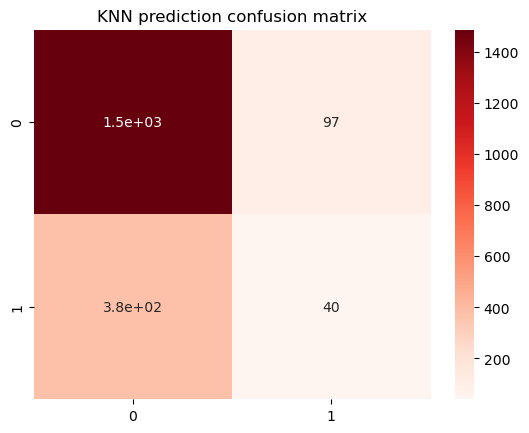

In [ ]:
# k-nearest neighbors modeling
knnmodel = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

knnmodel.fit(x_train, y_train)

# predict using the test set of x
knn_predict = knnmodel.predict(x_test)

# get accuracy score rounded to two decimal places
knnmode_accuracy = round(metrics.accuracy_score(y_test, knn_predict)*100, 2)

ConfusionMatrix = confusion_matrix(y_test, knn_predict)
print(ConfusionMatrix)

# confusion matrix of the KNN
matrix_knn = sns.heatmap(ConfusionMatrix, annot = True, cmap = plt.cm.Reds)
print(knnmode_accuracy)
plt.title('KNN prediction confusion matrix')
plt.show(matrix_knn)